In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
#Read data from the dataset
df=pd.read_csv('Customers_File.csv', delimiter=',')
df.head(10)

,Customer_ID,First_Name,Last_Name,DOB,Customer_Type,PAN,Date_of_joining,Date_of_exit,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,Country_of_residence,Country_of_Origin,Fraud
0,8606,RADDULAN,SAHIRON,21-05-1989,1,616802609,27-10-2008,03-06-2015,True,M,Married,False,False,Philippines,Philippines,Fraud
1,6462,AHMED,ABDULLAH,04-02-1963,1,868739475,18-04-2009,09-12-2019,True,M,Married,False,True,Egypt,Egypt,Fraud
2,9574,HASAN,IZZALDIN,24-04-1963,2,544436596,18-07-2003,23-07-2020,True,M,Married,False,False,Turkey,Kenya,Fraud
3,5350,AHLAM,AlTAMIMI,14-04-1980,3,212184907,17-11-2013,28-08-2011,False,F,Not Married,True,True,Turkey,Jordan,Fraud
4,8903,RAMADAN,SHALLAH,01-01-1958,2,849660885,10-04-2020,04-02-2014,False,M,Married,True,True,Gaza Strip,Gaza Strip,Fraud
5,9405,ABDELKARIM,MOHAMED,21-08-1986,2,843535347,26-08-2001,10-06-2020,True,M,Not Married,False,False,Syria,SauDiArabia,Fraud
6,6231,JOANNE,CHESIMARD,02-10-1952,2,422261413,30-01-2020,15-06-2013,False,M,Married,False,False,Indonesia,China,Fraud
7,5738,ALI,ATWA,17-10-1988,1,642127930,12-05-2015,12-05-2007,False,M,Married,False,True,China,Indonesia,Fraud
8,8954,SAIF,ADEL,02-02-1963,1,490435667,16-07-2015,13-01-2009,True,M,Married,True,False,Egypt,Honduras,Fraud
9,7037,AYMAN,ZAWAHIRI,03-09-1951,1,404226711,17-01-2008,31-08-2007,True,M,Not Married,False,True,Iraq,Pakistan,Fraud


In [3]:
#Data Pre-processing
#Removal of extra spaces from the data
df['First_Name']=df['First_Name'].str.lower()
df['Last_Name']=df['Last_Name'].str.lower()
#Converting columns into Lists for the tokernizer
first_name=list(df.First_Name.values)
last_name=list(df.Last_Name.values)
fraud=list(df.Fraud.values)

#DOB to be split into DD MM and YYYY for ML algo
df[['DD','MM','YYYY']]=df.DOB.str.split("-", expand=True,)
#Now DOB column can be dropped from the dataframe
df=df.drop(columns=['DOB','Date_of_joining','Date_of_exit'])
df['DD']=df['DD'].astype(int)
df['MM']=df['MM'].astype(int)
df['YYYY']=df['YYYY'].astype(int)

fraud={
    'Fraud' : 1,
    'Not Fraud' : 0
}

df = df.replace({'Fraud': fraud})
df.head(10)

,Customer_ID,First_Name,Last_Name,Customer_Type,PAN,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,Country_of_residence,Country_of_Origin,Fraud,DD,MM,YYYY
0,8606,raddulan,sahiron,1,616802609,True,M,Married,False,False,Philippines,Philippines,1,21,5,1989
1,6462,ahmed,abdullah,1,868739475,True,M,Married,False,True,Egypt,Egypt,1,4,2,1963
2,9574,hasan,izzaldin,2,544436596,True,M,Married,False,False,Turkey,Kenya,1,24,4,1963
3,5350,ahlam,altamimi,3,212184907,False,F,Not Married,True,True,Turkey,Jordan,1,14,4,1980
4,8903,ramadan,shallah,2,849660885,False,M,Married,True,True,Gaza Strip,Gaza Strip,1,1,1,1958
5,9405,abdelkarim,mohamed,2,843535347,True,M,Not Married,False,False,Syria,SauDiArabia,1,21,8,1986
6,6231,joanne,chesimard,2,422261413,False,M,Married,False,False,Indonesia,China,1,2,10,1952
7,5738,ali,atwa,1,642127930,False,M,Married,False,True,China,Indonesia,1,17,10,1988
8,8954,saif,adel,1,490435667,True,M,Married,True,False,Egypt,Honduras,1,2,2,1963
9,7037,ayman,zawahiri,1,404226711,True,M,Not Married,False,True,Iraq,Pakistan,1,3,9,1951


In [4]:
#Tokenizing First Name
tk_fn = Tokenizer(num_words=2, lower=False, oov_token=None)
tk_fn.fit_on_texts(first_name)
wi_fn=tk_fn.word_index
wi_fn

#Tokenizing Last Name
tk_ln = Tokenizer(num_words=2, lower=False, oov_token=None)
tk_ln.fit_on_texts(last_name)
wi_ln=tk_ln.word_index
wi_ln

#Reflecting changes to the Dataframe
df=df.replace({"First_Name" : wi_fn})
df=df.replace({"Last_Name" : wi_ln})

df = df.drop(columns='Customer_ID')

In [5]:
#Shuffling of the data in the dataframe to avoid overfitting or underfitting
df = df.sample(frac = 1)
df

,First_Name,Last_Name,Customer_Type,PAN,Deceased_Flag,Gender,Martial_Status,PEP_Flag,CTF_Flag,Country_of_residence,Country_of_Origin,Fraud,DD,MM,YYYY
1043,630,1941,3,799416448,False,F,Married,False,False,Australia,Libya,0,9,1,1979
4714,461,4832,3,689819651,False,M,Married,False,False,China,France,0,2,8,2000
9218,124,8408,5,431603759,False,F,Married,False,False,Indonesia,France,0,10,8,1981
10983,3097,9756,5,818302842,False,F,Married,False,False,China,Thailand,0,9,12,1995
1558,1733,2349,4,668406552,False,M,Not Married,False,False,China,United States,0,22,2,1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8572,222,7904,3,776519054,False,F,Married,False,False,China,Iran,0,6,8,2012
4437,4304,4616,5,778437181,False,M,Not Married,False,False,Norway,Mexico,0,30,8,2002
3695,697,45,5,623221796,False,M,Married,False,False,Brazil,China,0,6,9,2006
10996,2457,9766,4,325356100,False,M,Married,False,False,Ukraine,France,0,9,6,1975


In [6]:
#Machine Learning Starts
#Imports
import itertools
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import gridspec
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
#%matplotlib inline

In [7]:
#Dividing data into Input Vector and Dependent Variable
X=df[['First_Name','Last_Name','DD','MM','YYYY']].values
y=df['Fraud'].values

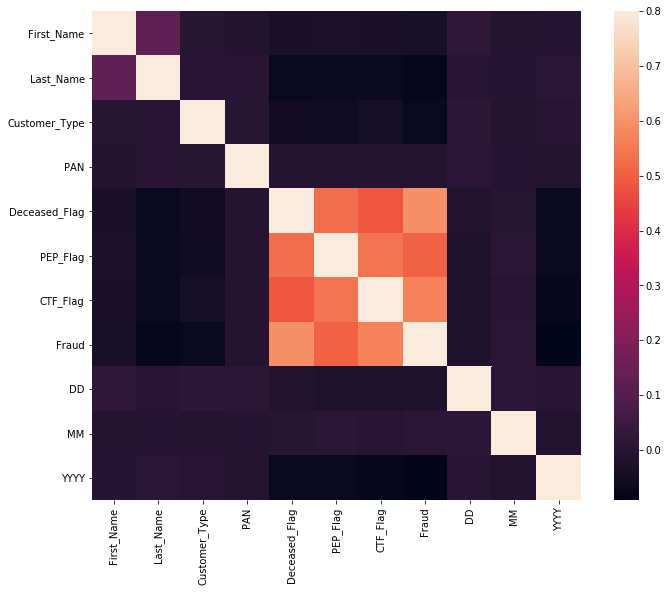

In [8]:
#Corelation Matrix
corrmat=df.corr()
fig = plt.figure(figsize = (12, 9)) 
sns.heatmap(corrmat, vmax = .8, square = True) 
plt.show()

In [9]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (8800, 5) (8800,)
Test set: (2200, 5) (2200,)


In [10]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [11]:
#Prediction
predTree = classifier.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 0 0 0 0]


In [12]:
#Evaluation
# Evaluating the classifier 
# printing every score of the classifier 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 
  
print("The model used is Decision Tree classifier") 
  
acc = accuracy_score(y_test, predTree) 
print("The accuracy is {}".format(acc)) 
  
#prec = precision_score(y_test, predTree) 
#print("The precision is {}".format(prec)) 
  
rec = recall_score(y_test, predTree) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_test, predTree) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_test, predTree) 
print("The Matthews correlation coefficient is{}".format(MCC)) 

The model used is Decision Tree classifier
The accuracy is 0.9986363636363637
The recall is 0.8461538461538461
The F1-Score is 0.8799999999999999
The Matthews correlation coefficient is0.8800277555803696


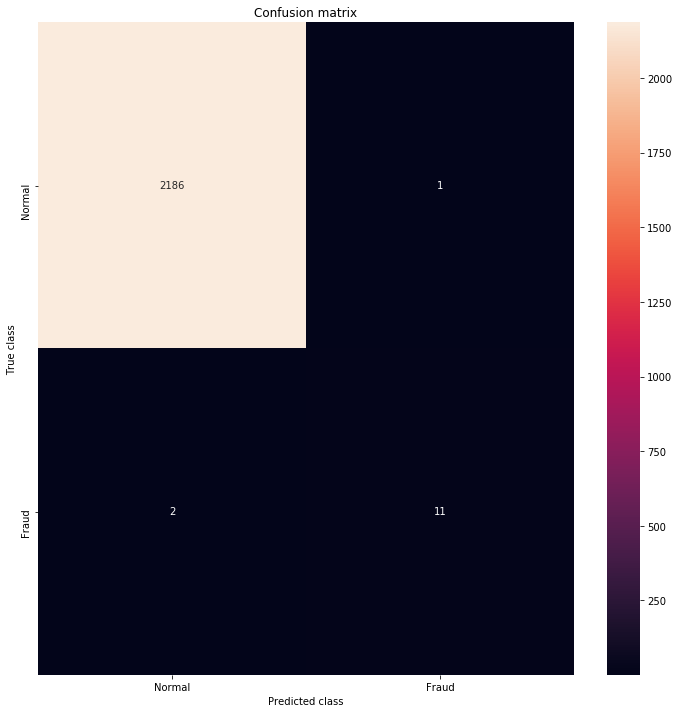

In [13]:
# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_test, predTree) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 